# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_df

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_name = clean_df['Drug Regimen'].unique()
drug_name.sort()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_tumor_df = pd.DataFrame(list(zip(drug_name, drug_mean, drug_median, drug_variance, drug_std, drug_sem)),
                             columns=['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance',
                                      'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.'])
drug_tumor_df = drug_tumor_df.set_index('Drug Regimen')
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_anaylsis = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median','var', 'std','sem'])
title_row = pd.MultiIndex.from_arrays([['Tumor Volume (mm3)']*len(drug_anaylsis.columns), drug_anaylsis.columns])

drug_anaylsis.columns = title_row
drug_anaylsis

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

C:\Users\kingl\AppData\Local\Temp\ipykernel_37392\1189724166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Drug Regimen'] = clean_df['Drug Regimen'].astype(str)


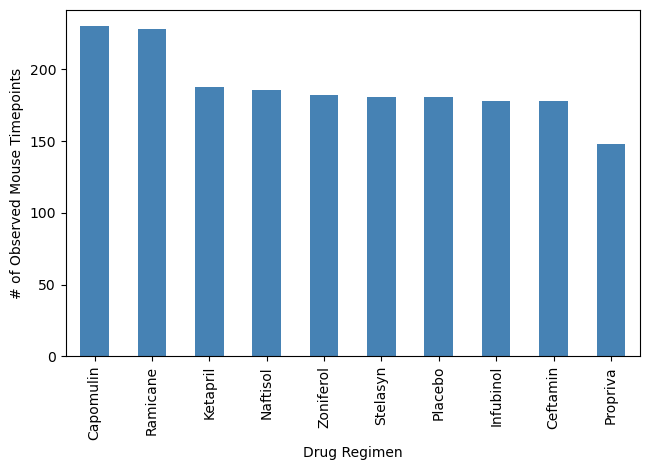

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df['Drug Regimen'] = clean_df['Drug Regimen'].astype(str)
timepoint_counts = clean_df['Drug Regimen'].value_counts()
timepoint_counts.plot.bar(color = 'steelblue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

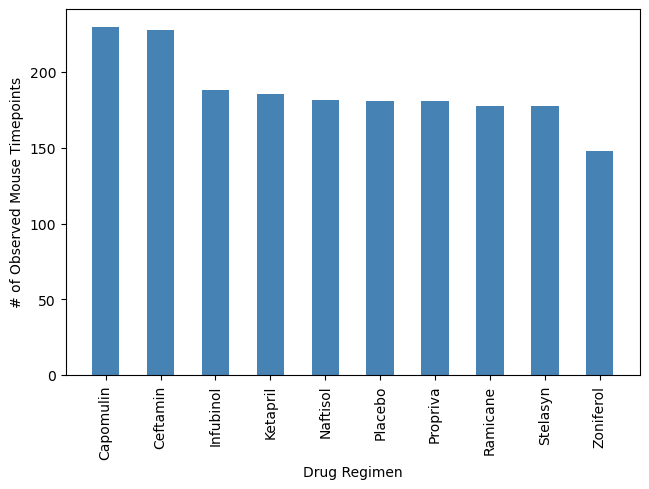

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_positions = np.arange(len(drug_name))
bar_width = 0.5
plt.bar(x_positions, timepoint_counts, color='steelblue', align='center', width = bar_width)
plt.xticks(x_positions, drug_name, rotation=90)
plt.tight_layout()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

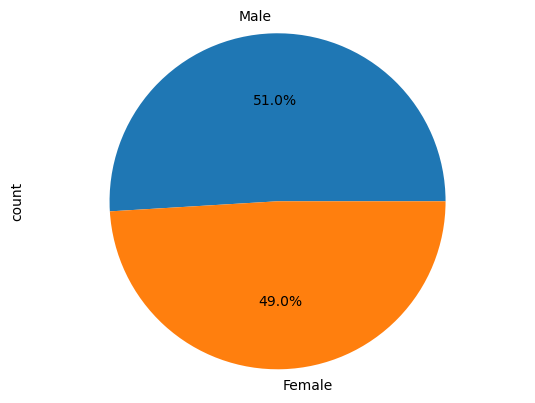

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()
labels = sex_counts.index
counts = sex_counts.values
male_index = labels.tolist().index('Male')
labels = labels[male_index:].tolist() + labels[:male_index].tolist()
counts = counts[male_index:].tolist() + counts[:male_index].tolist()
colors = ['steelblue', 'darkorange']
sex_counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

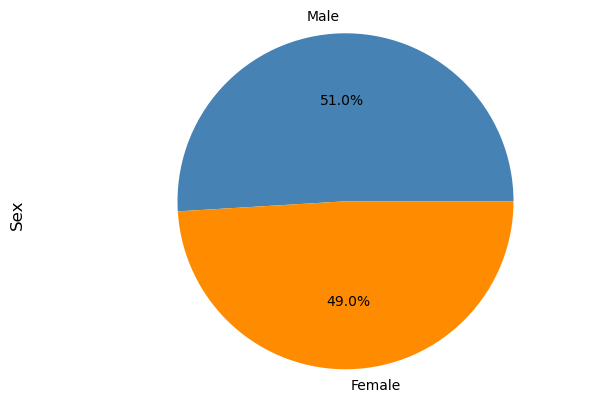

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['steelblue', 'darkorange']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.suptitle('Sex', x=0, y=0.5, rotation=90)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = last_timepoint.reset_index(name='Max_Timepoint')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_Tumor_df = pd.merge(merge_df, last_timepoint_df, on='Mouse ID', suffixes=('', '_Max'))
greatest_Tumor_df = greatest_Tumor_df[greatest_Tumor_df['Timepoint'] == greatest_Tumor_df['Max_Timepoint']]
greatest_Tumor_df.drop(columns=['Max_Timepoint'], inplace=True)
greatest_Tumor_df = greatest_Tumor_df.loc[greatest_Tumor_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
greatest_Tumor_df = greatest_Tumor_df.reset_index()
greatest_Tumor_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,214,c326,5,36.321346,0,Infubinol,Female,18,25
2,224,c139,45,72.226731,2,Infubinol,Male,11,28
3,226,v339,5,46.250112,0,Infubinol,Male,20,26
4,233,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...,...
95,1844,t565,45,34.455298,0,Capomulin,Female,20,17
96,1854,i557,45,47.685963,1,Capomulin,Female,1,24
97,1864,m957,45,33.329098,1,Capomulin,Female,3,19
98,1869,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = greatest_Tumor_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
boxplot_df = greatest_Tumor_df[['Drug Regimen', 'Tumor Volume (mm3)']].copy()
boxplot_df
    
    # Determine outliers using upper and lower bounds
for drug in treatments_list:
    drug_df = greatest_Tumor_df[greatest_Tumor_df['Drug Regimen'] == drug]
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_df.loc[(drug_df['Tumor Volume (mm3)'] < lower_bound) | (drug_df['Tumor Volume (mm3)'] > upper_bound), ['Tumor Volume (mm3)']]
    outliers = outliers.squeeze()

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 36.3213458
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


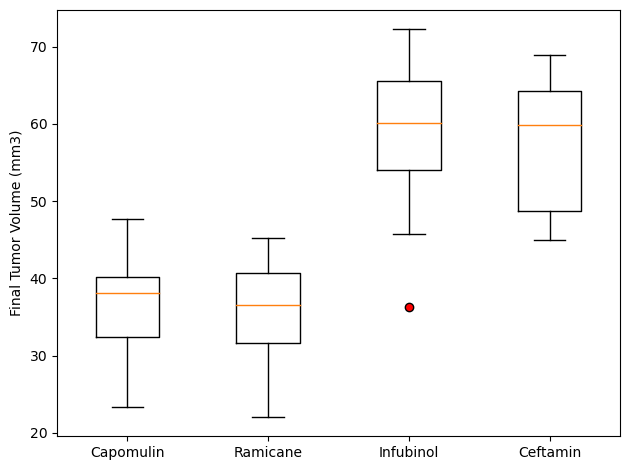

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_df = greatest_Tumor_df[['Drug Regimen', 'Tumor Volume (mm3)']].copy()
name_order = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
grouped_data = dict(tuple(boxplot_df.groupby('Drug Regimen')))
x_labels = [label for label in name_order if label in grouped_data]
data = [grouped_data[label]['Tumor Volume (mm3)'] for label in x_labels]
outlier_color = 'red'
plt.boxplot(data, labels=name_order, flierprops=dict(marker='o', markerfacecolor=outlier_color, markeredgecolor='black'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

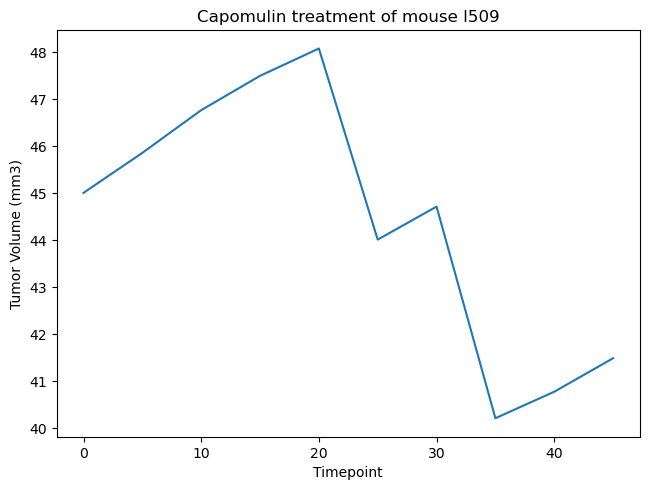

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_df.loc[clean_df['Mouse ID']=='l509']

mouse_data.plot(kind='line',x='Timepoint',y= 'Tumor Volume (mm3)', legend=False)
plt.tight_layout()
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

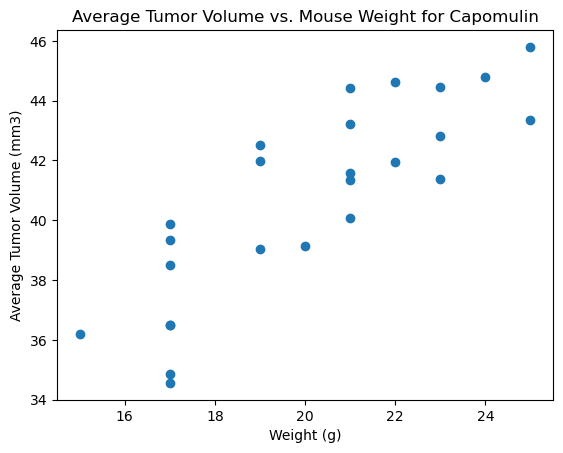

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
av_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight,av_tumor)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

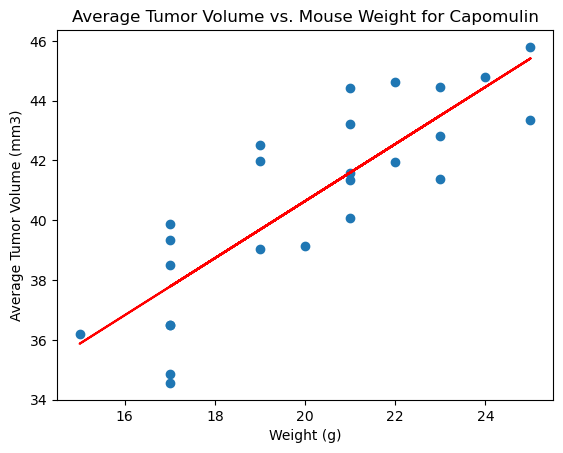

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, av_tumor)
fit = slope * weight + intercept
plt.scatter(weight, av_tumor)
plt.plot(weight,fit,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")